### 교통사고 사상자가 가장 많은 지역 3곳을 지도차트로 나타내보세요 (예제파일: 2016년_사망교통사고.csv)
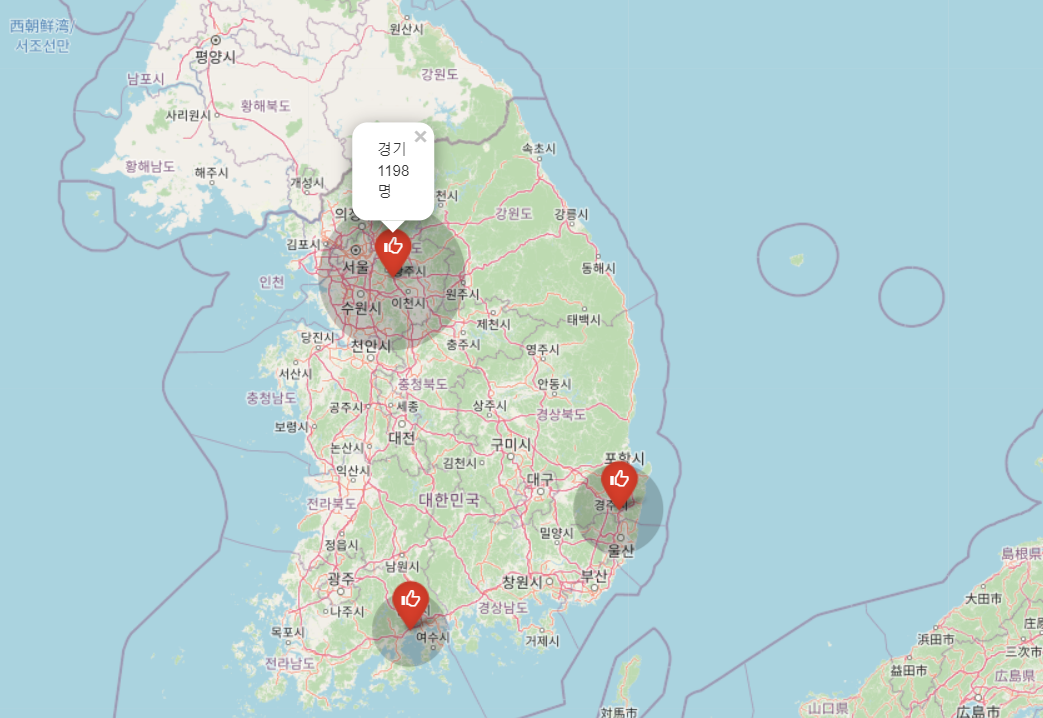

In [6]:
import folium
import pandas as pd

police=pd.read_csv('2016년_사망교통사고.csv', encoding='euc-kr')

사상자수=police.groupby('발생지시도')['사상자수'].sum().sort_values(ascending=False)[:3]
사상자수

좌표=[]
for i in 사상자수.index:
    for idx,j in enumerate(police['발생지시도']):
        if i==j:
            좌표.append([police['위도'][idx], police['경도'][idx]])
            break

좌표

사상자수.index[0]

m = folium.Map(
    location=[37.4963111,126.9552709],
    zoom_start=7,
)

for idx,i in enumerate(좌표):
    folium.Marker(
      location=i,
      popup=사상자수.index[idx]+str(사상자수[idx])+'명',
      icon=folium.Icon(color='red',icon='glyphicon glyphicon-thumbs-up',)
    ).add_to(m)

    folium.CircleMarker(
      i,
      radius=int(사상자수[idx]/20),
      color='#ffffgg',
      fill_color='#fffggg',
      popup='University of Seoul'
    ).add_to(m)

#지도 저장
m.save('map.html')

In [7]:
m